In [191]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

In [192]:
df1 = pd.read_csv('C:/Users/Lenovo/Desktop/DATA/msft.csv', index_col=0)
df1.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-30,19833.169922,19852.550781,19718.669922,19762.599609,271910000,19762.599609
2016-12-29,19835.460938,19878.439453,19788.939453,19819.779297,172040000,19819.779297
2016-12-28,19964.310547,19981.109375,19827.310547,19833.679688,188350000,19833.679688
2016-12-27,19943.460938,19980.240234,19939.800781,19945.039062,158540000,19945.039062
2016-12-23,19908.609375,19934.150391,19899.060547,19933.810547,158260000,19933.810547


In [193]:
df1.columns = ['open', 'high', 'low', 'close','volume','adjclose']
#df1['date'] = pd.to_datetime(df.date)
df = df1.drop('volume',axis=1)
df = df.drop('adjclose',axis=1)
df = df.drop('low',axis=1)
df = df.drop('high',axis=1)
df = df.drop('open',axis=1)
df.head()

,close
Date,
2016-12-30,19762.599609
2016-12-29,19819.779297
2016-12-28,19833.679688
2016-12-27,19945.039062
2016-12-23,19933.810547


In [194]:
from sklearn.model_selection import train_test_split
X = df.values
train, test = train_test_split(X)
history = [x for x in train]
predictions = list()

In [195]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))

C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Lenovo\Anaconda3\envs\tensorflow\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`

In [199]:
#test.head()
test1 = pd.DataFrame(test)
test1.columns = ['Actual Price']
predictions1 = pd.DataFrame(predictions)
predictions1.columns = ['Predicted Price']
predictions1.head()

,Predicted Price
0,13642.982846
1,13383.235009
2,14785.090738
3,14060.826226
4,15827.137257


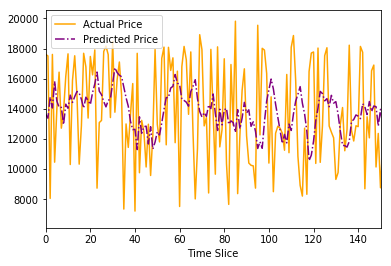

In [209]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = test1.plot(color = 'orange')
predictions1.plot(ax=ax, color='purple', linestyle='-.')
plt.xlabel('Time Slice')
ax.set_xlim(0,150)
#ax.set_ylim(0,20000)
plt.show()

In [ ]:
from sklearn import preprocessing
m = test #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
m_scaled = min_max_scaler.fit_transform(m)
test = pd.DataFrame(m_scaled)

m1 = predictions #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
m1_scaled = min_max_scaler.fit_transform(m1)
predictions= pd.DataFrame(m1_scaled)

In [ ]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
print ("r2 Score:", r2_score(test, predictions))
# plot
#ax = test.plot()
#pyplot.plot(test)
#pyplot.plot(predictions, color='red')
#pyplot.set_xlim(0,100)
#pyplot.show()